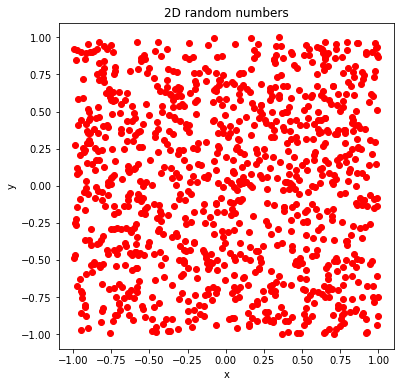

the value of pi is  3.168


In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
Ntot=1000
z=2.*(np.random.rand(Ntot,2)-0.5)
plt.rcParams["figure.figsize"] = (6.,6.)
plt.plot(z[:,0],z[:,1],"o",c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D random numbers")
plt.show()
Ncir=0
for i in range (0,len(z)):
    r=np.sqrt(pow((z[i,0]),2)+pow(z[i,1],2))
    if (r<1.):
        Ncir+=1
print("the value of pi is ",4.*Ncir/Ntot)

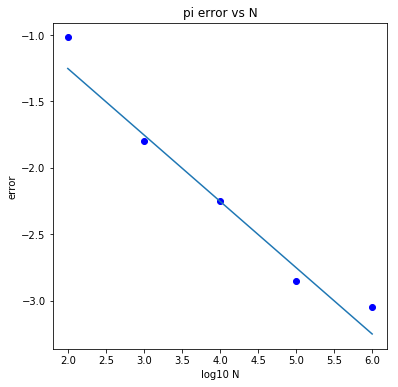

In [4]:
nn=7
Ntot = np.zeros(nn).astype('int')+1
pierr = np.zeros(nn).astype('float')
for j in range (2,nn,1):  
    Ntot[j]=pow(10,j)
    z=2.*(np.random.rand(Ntot[j],2)-0.5)
    Ncir=0
    for i in range (0,len(z)):
        r=np.sqrt(pow((z[i,0]),2)+pow(z[i,1],2))
        if (r<1.):
            Ncir+=1
    pierr[j]=abs(4.*Ncir/Ntot[j]/np.pi-1)
errbench=0.*Ntot+np.sqrt(Ntot[4]/Ntot)*pierr[4]
plt.rcParams["figure.figsize"] = (6.,6.)
plt.plot(np.log10(Ntot[2:nn]),np.log10(pierr[2:nn]),"o",c='b')
#plt.plot(np.log10(Ntot[2:nn-1]),np.log10(np.sqrt(Ntot[nn-1]/Ntot[2:nn-1])*pierr[nn-1]))
plt.plot(np.log10(Ntot[2:nn]),np.log10(errbench[2:nn]))
plt.xlabel("log10 N")
plt.ylabel("error")
plt.title("pi error vs N")
plt.show()
Ncir=0



In [16]:
# let's see what happens when we reuse the seed.
# first, two sequential calls without setting the seed:
print(np.random.rand(5))
print(np.random.rand(5))
print("\n now we'll set the seed: \n")
np.random.seed(102030405)
print(np.random.rand(5))
np.random.seed(102030405)
print(np.random.rand(5))



[0.7224824  0.46694565 0.29690065 0.85905682 0.9314062 ]
[0.96629653 0.68781457 0.8471025  0.34035617 0.78440013]

 now we'll set the seed: 

[0.25678158 0.37862602 0.14554446 0.05006093 0.65601936]
[0.25678158 0.37862602 0.14554446 0.05006093 0.65601936]


so the pseudorandom sequence is completely deterministic and repeatable! This is both a benefit and a pitfall.

Some information about Python's implementation is available [here](https://docs.python.org/3.5/library/random.html).

`Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes. `

The benefit is that it allows you to "rerun" an analysis with the same input numbers (even months later) for debugging purposes.

One more remark: we rely on random numbers both in the *distribution* of the values and in the *sequence*. One of the pitfalls of pseudorandom numbers is that there can be correlations between values in the sequence.